<p style = "font-size : 30px; color : white ; text-align : left; background-color : #c0c0ff; border-radius: 5px 5px; padding : 10px"><img src="https://upload.wikimedia.org/wikipedia/commons/d/dd/Booking.com_Logo.svg" style="width:368px;height:81px;"></p>

<a id = '8'></a>
<p style="border:3px solid #a63bff;text-align:left; color: #a63bff; font-size: 40px;">  Оглавление: </p>


<style>
a {
    color: #a63bff !important;
    font-size: 25px !important;
}
</style>
* <a href="#0">0. Introduction</a>
* <a href="#1">1. Start</a>
  * <a href="#1.1">1.1 Объединение данных</a>
* <a href="#2">2. Исследование данных</a>
* <a href="#3">3. Проектирование данных</a>
  * <a href="#3.1">3.1 Анализ дат </a>
  * <a href="#3.2">3.2 Анализ отелей </a>
  * <a href="#3.3">3.3 Координаты расположения отелей</a>
    * <a href="#3.3.1">3.3.1 Расстояние до центра</a>
  * <a href="#3.4">3.4 Информация о рецензенте</a>
  * <a href="#3.5">3.5 Обработка отзывов</a>
  * <a href="#3.6">3.6 Tags</a>
* <a href="#4">4. Очистка данных</a>
* <a href="#5">5. Model</a>
  * <a href="#5.1">5.1 Получение средней абсолютной ошибки</a>
* <a href="#6">6. Conclusion</a>
* <a href="#7">7. Submission </a>  

<a id = '0'></a>
<p style = "background-color : #ac67ff; border-radius: 5px 5px; padding : 10px">
<p style="color: #b29aff; font-size: 50px;">
    <strong>0. Introduction</strong>
</p>

<span style="color:#b29aff; font-family: 'Microsoft Sans Serif', Arial, sans-serif; font-size: 20px">
  
  В этом проекте мы будем работать с датасетом, в котором содержатся сведения о более чем 515 000 отзывов на отели Европы и Великобритании. Модель, которую мы будем обучать, должна предсказывать рейтинг отеля по данным сайта <b style="color:#a63bff"><strong>Booking.com</strong></b> на основе имеющихся в датасете данных.

<b style="color:#a63bff"><strong>Цель проекта:</strong></b>
* Построить модель на основе алгоритма машинного обучения - RandomForestRegressor, предсказывающую рейтинг отеля.

<b style="color:#a63bff"><strong>Задачи проекта:</strong></b>
* Исследовать данные датасета;
* Спроектировать новые признаки;
* Выполнить подготовку данных, которые будут использованы для обучения модели;
* Изучить пример машинного обучения (scikit-learn класс RandomForestRegressor);
* Проверить эффективность предлагаемой модели, используя метрику MAPE;
* Принять участие в соревнованиях на площадке <b style="color:#a63bff"><strong>kaggle.com</strong></b>.
    
<b style="color:#a63bff; font-size: 30px"><strong>Описание данных</strong></b>
    
    
<table >
   <tr>
    <th>Признак</th>
    <th>Описание</th>
  </tr>
  
   <tr>
    <td>hotel_address</td>
    <td>street, post code, city, country </td>
  </tr>
    
   <tr>
    <td>additional_number_of_scoring</td>
    <td>the number of hotel scores without review </td>
  </tr> 
    
  <tr>
    <td>review_date</td>
    <td>the day of review </td>
  </tr>
    
  <tr>
    <td>average_score</td>
    <td>the average rating of the hotel </td>
  </tr>
    
   <tr>
    <td>hotel_name</td>
    <td>the full name of hotel </td>
  </tr>
    
   <tr>
    <td>reviewer_nationality</td>
    <td>country from which the reviewer came </td>
  </tr>
    
   <tr>
    <td>negative_review </td>
    <td>text of negative review </td>
  </tr> 
   
   <tr>
    <td>review_total_negative_word_counts </td>
    <td>the total number words of negative review </td>
  </tr>  
    
   <tr>
    <td>total_number_of_reviews </td>
    <td>the total number of reviews that the hotel has </td>
  </tr>  
    
   <tr>
    <td>positive_review</td>
    <td>text of positive review </td>
  </tr> 
    
   <tr>
    <td>review_total_positive_word_counts</td>
    <td>the total number words of positive review </td>
  </tr> 
    
  <tr>
    <td>total_number_of_reviews_reviewer_has_given</td>
    <td>the total number of reviews reviewer has given </td>
  </tr> 
    
   <tr>
    <td>reviewer_score</td>
    <td>the number of reviewer score </td>
  </tr> 
    
   <tr>
    <td>tags</td>
    <td>tags that describe purpose of trip,type of room, count of nights of reviewer </td>
  </tr> 
    
   <tr>
    <td>days_since_review</td>
    <td>a difference in the number of days between review date and scrape date</td>
  </tr> 
    
   <tr>
    <td>lat</td>
    <td>latitude coordinate of hotel location </td>
  </tr> 
    
   <tr>
    <td>lng</td>
    <td>longitude coordinate of hotel location </td>
  </tr> 
    
</table>


</span>

<a id = '1'></a>
<p style = "background-color : #ac67ff; border-radius: 5px 5px; padding : 10px">
<p style="color: #b29aff; font-size: 50px;">
    <strong>1. Start</strong>
</p>

<style>
a {
    color: #a63bff !important;
    font-size: 20px !important;
}
</style>
⮬ <a href="#8">к оглавлению</a>

In [1]:
%%capture

##############################################

# https://www.kaggle.com/code/fobosal/project-3-booking

# установка дополнительных библиотек:
# !pip install Afinn
# !pip install nltk[twitter]
# !pip install wordcloud
# !pip install spacy 

#python -m spacy download en_core_web_lg
#python -m spacy download en_core_web_sm


import pandas as pd
import numpy as np
import re
import geopy.distance
from scipy import stats
from category_encoders import  OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import f_classif

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt  
import seaborn as sns  
import plotly.express as px
%matplotlib inline

from wordcloud import WordCloud

# инструменты для лингвистического анализа:
import string
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob, Blobber
from textblob.sentiments import NaiveBayesAnalyzer
from afinn import Afinn
nltk.download('vader_lexicon')

import warnings
pd.options.mode.chained_assignment = None # SettingWithCopyWarning ignore
warnings.simplefilter(action='ignore', category=FutureWarning) # FutureWarning ignore

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



In [2]:
# Для воспроизводимости зафиксируем RANDOM_SEED
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
#!pip freeze > requirements.txt

In [3]:
# данные из соревнования
#DATA_DIR = '/kaggle/input/sf-booking/'
#df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') 
#df_test = pd.read_csv(DATA_DIR+'hotels_test.csv') 
#sample_submission = pd.read_csv(DATA_DIR+'/submission.csv')

DATA_DIR = 'P:/_Data Scientist DSPR-107/EDA-7. PROJECT-3. Feature Engineering. Соревнование на Kaggle/data/sf-booking'
df_train = pd.read_csv(DATA_DIR+'/hotels_train.csv') 
df_test = pd.read_csv(DATA_DIR+'/hotels_test.csv') 
sample_submission = pd.read_csv(DATA_DIR+'/submission.csv')

<a id = '1.1'></a>
<p style="color: #b29aff; font-size: 45px;">
    <strong>1.1 Объединение данных</strong>
</p>

<style>
a {
    color: #a63bff !important;
    font-size: 20px !important;
}
</style>
⮬ <a href="#8">к оглавлению</a>

In [4]:
# ВАЖНО! для корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['reviewer_score'] = 0 # в тесте у нас нет значения reviewer_score, мы его должны предсказать, по этому пока просто заполняем нулями

# объединяем данные в один dataset
df = pd.concat([df_train, df_test], ignore_index=True)
#df['sample'] = df['sample'].astype('category')

In [5]:
data = df.copy()

In [7]:
#data1 = df.copy()
#data1.info()

In [8]:
#data = data1.drop_duplicates()

In [9]:
data.columns

Index(['hotel_address', 'additional_number_of_scoring', 'review_date',
       'average_score', 'hotel_name', 'reviewer_nationality',
       'negative_review', 'review_total_negative_word_counts',
       'total_number_of_reviews', 'positive_review',
       'review_total_positive_word_counts',
       'total_number_of_reviews_reviewer_has_given', 'reviewer_score', 'tags',
       'days_since_review', 'lat', 'lng', 'sample'],
      dtype='object')

In [10]:
#в каких столбцах числовые значения:
digit_columns = [s for s in data.columns if (data[s].dtypes == 'int64') | (data[s].dtypes == 'float64')]
digit_columns

['additional_number_of_scoring',
 'average_score',
 'review_total_negative_word_counts',
 'total_number_of_reviews',
 'review_total_positive_word_counts',
 'total_number_of_reviews_reviewer_has_given',
 'reviewer_score',
 'lat',
 'lng',
 'sample']

In [11]:
#в каких столбцах строковые значения:
object_columns = [s for s in data.columns if data[s].dtypes == 'object']
object_columns

['hotel_address',
 'review_date',
 'hotel_name',
 'reviewer_nationality',
 'negative_review',
 'positive_review',
 'tags',
 'days_since_review']

<a id = '2'></a>
<p style = "background-color : #ac67ff; border-radius: 5px 5px; padding : 10px">
<p style="color: #b29aff; font-size: 50px;">
    <strong>2. Исследование данных</strong>
</p>

<style>
a {
    color: #a63bff !important;
    font-size: 20px !important;
}
</style>
⮬ <a href="#8">к оглавлению</a>

<span style="color:#b29aff; font-family: 'Microsoft Sans Serif', Arial, sans-serif; font-size: 20px">
  
Рассмотрим наш объединённый датасет
</span>

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               515738 non-null  object 
 1   additional_number_of_scoring                515738 non-null  int64  
 2   review_date                                 515738 non-null  object 
 3   average_score                               515738 non-null  float64
 4   hotel_name                                  515738 non-null  object 
 5   reviewer_nationality                        515738 non-null  object 
 6   negative_review                             515738 non-null  object 
 7   review_total_negative_word_counts           515738 non-null  int64  
 8   total_number_of_reviews                     515738 non-null  int64  
 9   positive_review                             515738 non-null  object 
 

<span style="color:#b29aff; font-family: 'Microsoft Sans Serif', Arial, sans-serif; font-size: 20px">
  
Пропуски данных только в стобцах <b style="color:#a63bff"><strong>lat</strong></b> и <b style="color:#a63bff"><strong>lng</strong></b>.

</span>

In [13]:
# Группируем по отелям и посмотрим у каких отелей отсутствуют геоданные
hotels_no_coor = data[data.lng.isna() & data.lat.isna()].groupby(by = ['hotel_address','hotel_name']).\
  count().iloc[:,0].to_frame().reset_index()
hotels_no_coor.sample(3)

,hotel_address,hotel_name,additional_number_of_scoring
15,W hringer Stra e 12 09 Alsergrund 1090 Vienna ...,Hotel Pension Baron am Schottentor,223
5,Hasenauerstra e 12 19 D bling 1190 Vienna Austria,Hotel Park Villa,61
6,Josefst dter Stra e 10 12 08 Josefstadt 1080 V...,Fleming s Selection Hotel Wien City,658


In [14]:
print(f"Количество отелей с отсутствующими координатами: {data[data['lat'].isnull()]['hotel_name'].nunique()}.")

Количество отелей с отсутствующими координатами: 17.


In [15]:
data.nunique()

hotel_address                                   1493
additional_number_of_scoring                     480
review_date                                      731
average_score                                     34
hotel_name                                      1492
reviewer_nationality                             227
negative_review                               330011
review_total_negative_word_counts                402
total_number_of_reviews                         1142
positive_review                               412601
review_total_positive_word_counts                365
total_number_of_reviews_reviewer_has_given       198
reviewer_score                                    38
tags                                           55242
days_since_review                                731
lat                                             1472
lng                                             1472
sample                                             2
dtype: int64

<span style="color:#b29aff; font-family: 'Microsoft Sans Serif', Arial, sans-serif; font-size: 20px">
  
Видно, что количество уникальных отелей <b style="color:#a63bff"><strong>1493</strong></b>, а адресов <b style="color:#a63bff"><strong>1492</strong></b>.

</span>

In [16]:
# Создание нового DataFrame с уникальными значениями
unique_df = data.drop_duplicates()

# Группировка данных и сбор адресов в список для каждого отеля
grouped_addresses = unique_df.groupby('hotel_name')['hotel_address'].apply(list)

# Поиск отеля с двумя разными адресами
for hotel, addresses in grouped_addresses.iteritems():
    if len(set(addresses)) > 1:
        print("Отель:\n", hotel)
        print("Адреса:\n", addresses)
        print("-"*len(addresses))

Отель:
 Hotel Regina
Адреса:
 ['Bergara 2 4 Eixample 08002 Barcelona Spain', 'Bergara 2 4 Eixample 08002 Barcelona Spain', 'Rooseveltplatz 15 09 Alsergrund 1090 Vienna Austria', 'Via Cesare Correnti 13 Milan City Center 20123 Milan Italy', 'Rooseveltplatz 15 09 Alsergrund 1090 Vienna Austria', 'Bergara 2 4 Eixample 08002 Barcelona Spain', 'Bergara 2 4 Eixample 08002 Barcelona Spain', 'Bergara 2 4 Eixample 08002 Barcelona Spain', 'Bergara 2 4 Eixample 08002 Barcelona Spain', 'Bergara 2 4 Eixample 08002 Barcelona Spain', 'Rooseveltplatz 15 09 Alsergrund 1090 Vienna Austria', 'Bergara 2 4 Eixample 08002 Barcelona Spain', 'Bergara 2 4 Eixample 08002 Barcelona Spain', 'Bergara 2 4 Eixample 08002 Barcelona Spain', 'Bergara 2 4 Eixample 08002 Barcelona Spain', 'Bergara 2 4 Eixample 08002 Barcelona Spain', 'Bergara 2 4 Eixample 08002 Barcelona Spain', 'Bergara 2 4 Eixample 08002 Barcelona Spain', 'Bergara 2 4 Eixample 08002 Barcelona Spain', 'Bergara 2 4 Eixample 08002 Barcelona Spain', 'Via C

<span style="color:#b29aff; font-family: 'Microsoft Sans Serif', Arial, sans-serif; font-size: 20px">
  
Получаем, что в трёх разных странах есть отель с одинаковым названием <b style="color:#a63bff"><strong>Hotel Regina</strong></b>, но тогда цифры всё равно но сходятся. Получается, что есть два отеля по одному адресу (возможно один отель был переименован).

</span>

In [17]:
grouped1_addresses = unique_df.groupby('hotel_address')['hotel_name'].apply(list)

# Поиск отелей с одним адресом
for address, hotel in grouped1_addresses.iteritems():
    if len(set(hotel)) > 1:
        print("Hotels:\n", set(hotel))
        print("Address:\n", address)
        print("-"*len(address))

hotel:
 {'Club Quarters Hotel Trafalgar Square', 'The Grand at Trafalgar Square'}
address:
 8 Northumberland Avenue Westminster Borough London WC2N 5BY United Kingdom
--------------------------------------------------------------------------


<span style="color:#b29aff; font-family: 'Microsoft Sans Serif', Arial, sans-serif; font-size: 20px">
  
Проверим датасет на дубликаты.

</span>

In [18]:
data_dubl_sum = data.duplicated().sum()

print("Количество дубликатов:", data_dubl_sum)

Количество дубликатов: 336


In [19]:
# Фильтруем и выводим все дубликаты
data_dubl = data[data.duplicated(keep=False)]

In [20]:
data_dubl.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 672 entries, 1674 to 513653
Data columns (total 18 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   hotel_address                               672 non-null    object 
 1   additional_number_of_scoring                672 non-null    int64  
 2   review_date                                 672 non-null    object 
 3   average_score                               672 non-null    float64
 4   hotel_name                                  672 non-null    object 
 5   reviewer_nationality                        672 non-null    object 
 6   negative_review                             672 non-null    object 
 7   review_total_negative_word_counts           672 non-null    int64  
 8   total_number_of_reviews                     672 non-null    int64  
 9   positive_review                             672 non-null    object 
 10  review_t

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [22]:
df_train.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng,sample
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671,1
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097,1


In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 18 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               128935 non-null  object 
 1   additional_number_of_scoring                128935 non-null  int64  
 2   review_date                                 128935 non-null  object 
 3   average_score                               128935 non-null  float64
 4   hotel_name                                  128935 non-null  object 
 5   reviewer_nationality                        128935 non-null  object 
 6   negative_review                             128935 non-null  object 
 7   review_total_negative_word_counts           128935 non-null  int64  
 8   total_number_of_reviews                     128935 non-null  int64  
 9   positive_review                             128935 non-null  object 
 

In [24]:
df_test.head(2)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,tags,days_since_review,lat,lng,sample,reviewer_score
0,Via Senigallia 6 20161 Milan Italy,904,7/21/2017,8.1,Hotel Da Vinci,United Kingdom,Would have appreciated a shop in the hotel th...,52,16670,Hotel was great clean friendly staff free bre...,62,1,"[' Leisure trip ', ' Couple ', ' Double Room '...",13 days,45.533137,9.171102,0,0
1,Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...,612,12/12/2016,8.6,Urban Lodge Hotel,Belgium,No tissue paper box was present at the room,10,5018,No Positive,0,7,"[' Leisure trip ', ' Group ', ' Triple Room ',...",234 day,52.385649,4.834443,0,0


In [25]:
sample_submission.head(5)

,reviewer_score,id
0,1,488440
1,10,274649
2,3,374688
3,10,404352
4,9,451596


In [26]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128935 entries, 0 to 128934
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype
---  ------          --------------   -----
 0   reviewer_score  128935 non-null  int64
 1   id              128935 non-null  int64
dtypes: int64(2)
memory usage: 2.0 MB


<a id = '3'></a>
<p style = "background-color : #ac67ff; border-radius: 5px 5px; padding : 10px">
<p style="color: #b29aff; font-size: 50px;">
    <strong>3. Проектирование данных</strong>
</p>

<style>
a {
    color: #a63bff !important;
    font-size: 20px !important;
}
</style>
⮬ <a href="#8">к оглавлению</a>

<a id = '3.1'></a>
<p style="color: #b29aff; font-size: 45px;">
    <strong>3.1 Анализ дат</strong>
</p>

<span style="color:#b29aff; font-family: 'Microsoft Sans Serif', Arial, sans-serif; font-size: 20px">
  
Создадим новые признаки из даты: год, месяц.

</span>

In [27]:
data['review_date'] = pd.to_datetime(data['review_date'])
data['month']=pd.to_datetime(data['review_date']).dt.month
data['year']=pd.to_datetime(data['review_date']).dt.year

<a id = '3.2'></a>
<p style="color: #b29aff; font-size: 45px;">
    <strong>3.2 Анализ отелей</strong>
</p>

<style>
a {
    color: #a63bff !important;
    font-size: 20px !important;
}
</style>
⮬ <a href="#8">к оглавлению</a>

In [6]:
#!pip install geopy

from geopy.geocoders import Nominatim
from geopy.distance import geodesic
from geopy.extra.rate_limiter import RateLimiter

from colorama import Fore, Back, Style

In [13]:
# Создадим список со всеми отелями и их кординатами
hotels_with_coor = data.groupby(['hotel_address','lat','lng']).count().reset_index().iloc[:,:3].set_index('hotel_address')


In [18]:
hotels_with_coor

,lat,lng,country,city
hotel_address,,,,
s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,52.360576,4.915968,Netherlands,Amsterdam
1 15 Templeton Place Earl s Court Kensington and Chelsea London SW5 9NB United Kingdom,51.491888,-0.194971,United Kingdom,London
1 2 Serjeant s Inn Fleet Street City of London London EC4Y 1LL United Kingdom,51.513734,-0.108751,United Kingdom,London
1 3 Queens Garden Westminster Borough London W2 3BA United Kingdom,51.514218,-0.180903,United Kingdom,London
1 3 Rue d Argentine 16th arr 75116 Paris France,48.874348,2.289733,France,Paris
...,...,...,...,...
Wiedner Hauptstra e 44 04 Wieden 1040 Vienna Austria,48.193523,16.366915,Austria,Vienna
Wildpretmarkt 5 01 Innere Stadt 1010 Vienna Austria,48.210447,16.371578,Austria,Vienna
Wilton Place Knightsbridge Westminster Borough London SW1X 7RL United Kingdom,51.502091,-0.157779,United Kingdom,London


In [15]:

# Выделим страну из адресной строки
hotels_with_coor.loc[:,'country'] = \
hotels_with_coor.loc[:].apply(lambda x : 'United Kingdom' if x.name.split()[-1] == 'Kingdom' else x.name.split()[-1], axis = 1)


In [17]:

# Выделим город из адресной строки
hotels_with_coor.loc[:,'city'] = hotels_with_coor.apply(lambda x: ','.join(x.name.split(' ')[-2:-1]), axis = 1)
hotels_with_coor.city = hotels_with_coor.city.apply(lambda x: 'London' if x == 'United' else x)


In [19]:


# Создадим отдельный датасет только одержащий уникальные города из датасета
city_coors = pd.DataFrame(hotels_with_coor.city.unique(), columns=['name'])


In [20]:
city_coors

,name
0,Amsterdam
1,London
2,Paris
3,Barcelona
4,Milan
5,Vienna


In [21]:

# используем библиотеку для работы с геокоординатами
geolocator = Nominatim(user_agent="AV_Kaggle")
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)

# Получим координаты центров для представленных в базе городов
city_coors['lat'], city_coors['lng'] = zip(*city_coors.name.apply(lambda x : geolocator.geocode(x)[1]))


In [22]:

# Создадим словарь с индексом название города и данными {lat,lng}
dict_city_locs = city_coors.set_index('name').to_dict('dict')


In [23]:

# Создадим в датасете отелей новый признак, координаты центра города, где отель находится
hotels_with_coor['center_lat'] = hotels_with_coor['city'].map(dict_city_locs['lat'])
hotels_with_coor['center_lng'] = hotels_with_coor['city'].map(dict_city_locs['lng'])


In [24]:

# рассчитаем расстояние по прямой от координат отеля до центра города
hotels_with_coor['distance_from_center'] = hotels_with_coor.apply(lambda x :\
  geodesic((x.lat,x.lng),(x.center_lat, x.center_lng)).kilometers, axis = 1)


In [25]:

# Создадим новый словарь с полученными ранее данными
dict_hotel_extra = hotels_with_coor[['country','city','distance_from_center']].\
  to_dict('dict')


In [26]:

# Создадим новые признаки в основном датафрейме
data['city'] = data.hotel_address.map(dict_hotel_extra['city'])
data['country'] = data.hotel_address.map(dict_hotel_extra['country'])
#data['post_index'] = data.hotel_address.map(dict_hotel_extra['post_index'])
data['distance_from_center'] = data.hotel_address.map(dict_hotel_extra['distance_from_center'])


In [27]:

print(f"{Fore.LIGHTBLUE_EX}\nУникальных стран:{Fore.LIGHTGREEN_EX} {', '.join(hotels_with_coor.country.unique())}")
print(f"{Fore.LIGHTBLUE_EX}\nУникальных городов:{Fore.LIGHTGREEN_EX} {', '.join(city_coors.name.values)}")




Уникальных стран: Netherlands, United Kingdom, France, Spain, Italy, Austria

Уникальных городов: Amsterdam, London, Paris, Barcelona, Milan, Vienna


In [28]:
hotels_with_coor

,lat,lng,country,city,center_lat,center_lng,distance_from_center
hotel_address,,,,,,,
s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands,52.360576,4.915968,Netherlands,Amsterdam,52.373080,4.892453,2.121637
1 15 Templeton Place Earl s Court Kensington and Chelsea London SW5 9NB United Kingdom,51.491888,-0.194971,United Kingdom,London,51.507336,-0.127650,4.980755
1 2 Serjeant s Inn Fleet Street City of London London EC4Y 1LL United Kingdom,51.513734,-0.108751,United Kingdom,London,51.507336,-0.127650,1.492677
1 3 Queens Garden Westminster Borough London W2 3BA United Kingdom,51.514218,-0.180903,United Kingdom,London,51.507336,-0.127650,3.775524
1 3 Rue d Argentine 16th arr 75116 Paris France,48.874348,2.289733,France,Paris,48.853495,2.348391,4.888809
...,...,...,...,...,...,...,...
Wiedner Hauptstra e 44 04 Wieden 1040 Vienna Austria,48.193523,16.366915,Austria,Vienna,48.208354,16.372504,1.700576
Wildpretmarkt 5 01 Innere Stadt 1010 Vienna Austria,48.210447,16.371578,Austria,Vienna,48.208354,16.372504,0.242706
Wilton Place Knightsbridge Westminster Borough London SW1X 7RL United Kingdom,51.502091,-0.157779,United Kingdom,London,51.507336,-0.127650,2.171847


In [ ]:
data.sample(2)

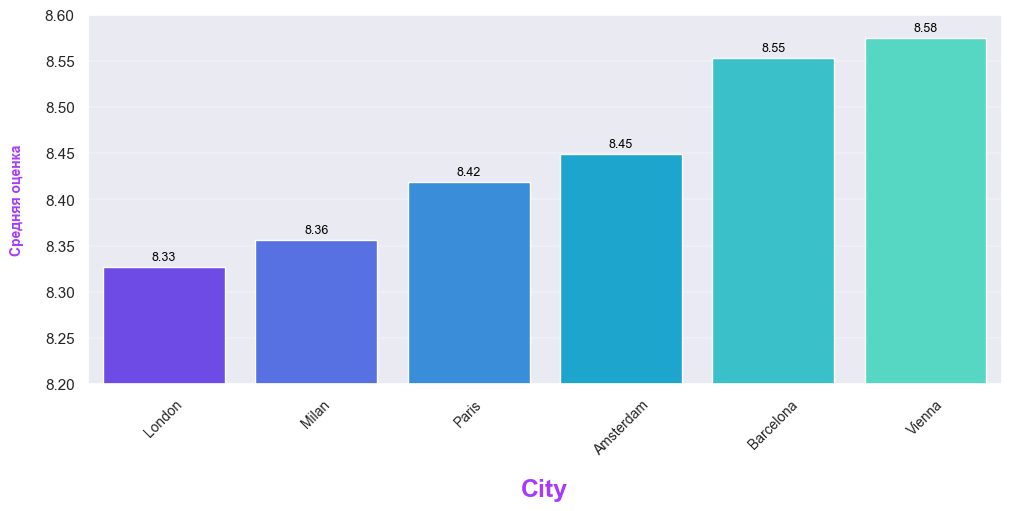

In [55]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

cities = pd.pivot_table(
    data=data[data['sample']==1],
    index='city', 
    values='reviewer_score', 
    aggfunc=['mean'])

# Сортировка данных по столбцу 'mean'
cities.sort_values(by=('mean', 'reviewer_score'), inplace=True)

sns.set(rc={"grid.linewidth": 0.3})
sns.set_style("darkgrid")

fig, ax1 = plt.subplots(figsize=(10, 5), constrained_layout=True)
ax1.set_ylim(8.2, 8.6)

pal = sns.color_palette("rainbow", 15)
sns.set_palette(pal)

# Построение столбчатой диаграммы с упорядоченными данными 
sns.barplot(x=cities.index, y=cities[('mean', 'reviewer_score')],
            ax=ax1)

# Добавление значений на каждый столбец
for index, value in enumerate(cities[('mean', 'reviewer_score')]):
    ax1.annotate(round(value, 2), xy=(index, value), xytext=(0, 5),
                 textcoords="offset points", ha='center', fontsize=9, color='black')

ax1.tick_params(axis='x', rotation=45, labelsize=10)

# Подписи осей
ax1.set_xlabel('City', fontsize=18, labelpad=15,
               fontdict={'color': '#a63bff', 'fontweight': 600})
ax1.set_ylabel('Средняя оценка', fontsize=10, labelpad=15,
               fontdict={'color': '#a63bff', 'fontweight': 600})

plt.show()


In [63]:
data['hotel_address'].unique()

array(['Stratton Street Mayfair Westminster Borough London W1J 8LT United Kingdom',
       '130 134 Southampton Row Camden London WC1B 5AF United Kingdom',
       '151 bis Rue de Rennes 6th arr 75006 Paris France', ...,
       'Prinsengracht 717 Amsterdam City Center 1017 JW Amsterdam Netherlands',
       '43 Rue De l Abb Gr goire 6th arr 75006 Paris France',
       'Johann Staud Stra e 32 16 Ottakring 1160 Vienna Austria'],
      dtype=object)

Комментарии / выводы:

Из анализа созданных новых признаков мы видим, что отели распологаются в 6 странах и в 6 крупных городах - туристических центрах. Количественные данные совпадают. Для построения модели ML предлагается произвести кодировку по методу однократного кодирования OneHot.

In [64]:
# исследуем данные о названии на наличие пропусков и дубликатов:
pivot_n = data[['hotel_address', 'hotel_name']].groupby(
    by='hotel_name'
).nunique()

name_rep = pivot_n[pivot_n['hotel_address'] != 1].index.to_list()
mask = data['hotel_name'].isin(name_rep)
addresses_rep = data[mask][['hotel_name', 'hotel_address']].value_counts()

print('Дублирование названия отеля:')
display(addresses_rep)


Дублирование названия отеля:


hotel_name    hotel_address                                             
Hotel Regina  Bergara 2 4 Eixample 08002 Barcelona Spain                    590
              Rooseveltplatz 15 09 Alsergrund 1090 Vienna Austria           284
              Via Cesare Correnti 13 Milan City Center 20123 Milan Italy     60
dtype: int64

In [65]:

# чтобы различать эти отели при анализе - добавим в название город:
data['hotel_name'] = data.apply(
    lambda row: (row['hotel_name'] + ' ' + row['hotel_address'].split()[-2])
    if (row['hotel_name'] in name_rep)
    else row['hotel_name'], axis=1)

print('\nПроверим полученные изменения:')
mask = data['hotel_name'].str.contains(name_rep[0])
display(data[mask]['hotel_name'].value_counts())


Проверим полученные изменения:


Hotel Regina Barcelona    590
Hotel Regina Vienna       284
Hotel Regina Milan         60
Name: hotel_name, dtype: int64

In [66]:
#выбираем страну из адреса отеля
data['hotel_country'] = data['hotel_address'].apply(
    lambda x: 'United Kingdom' if x.split()[-1] == 'Kingdom' else x.split()[-1])

In [67]:
# Для распечатки в цвете
from termcolor import colored

data['hotel_city'] = data['hotel_address'].apply\
(lambda x: x.split()[-5] if x.split()[-1] == 'Kingdom' else x.split()[-2])

print(colored('\n Какие города получились в датасете:', 'green'))
data['hotel_city'].value_counts()



 Какие города получились в датасете:


London       262301
Barcelona     60149
Paris         59928
Amsterdam     57214
Vienna        38939
Milan         37207
Name: hotel_city, dtype: int64

In [68]:
#закодируем название стран
import category_encoders as ce
encoder = ce.OneHotEncoder()
data['make_hotel_name'] = data['hotel_country'].astype('category')
data_bin = encoder.fit_transform(data['hotel_country'])
data_bin.rename(columns={'hotel_country' : 'hotel_country_c'}, inplace=True)
data = pd.concat([data, data_bin], axis=1)

In [39]:
data.nunique(dropna=False)

hotel_address                                   1493
additional_number_of_scoring                     480
review_date                                      731
average_score                                     34
hotel_name                                      1494
reviewer_nationality                             227
negative_review                               330011
review_total_negative_word_counts                402
total_number_of_reviews                         1142
positive_review                               412601
review_total_positive_word_counts                365
total_number_of_reviews_reviewer_has_given       198
reviewer_score                                    38
tags                                           55242
days_since_review                                731
lat                                             1473
lng                                             1473
sample                                             2
month                                         

<AxesSubplot: >

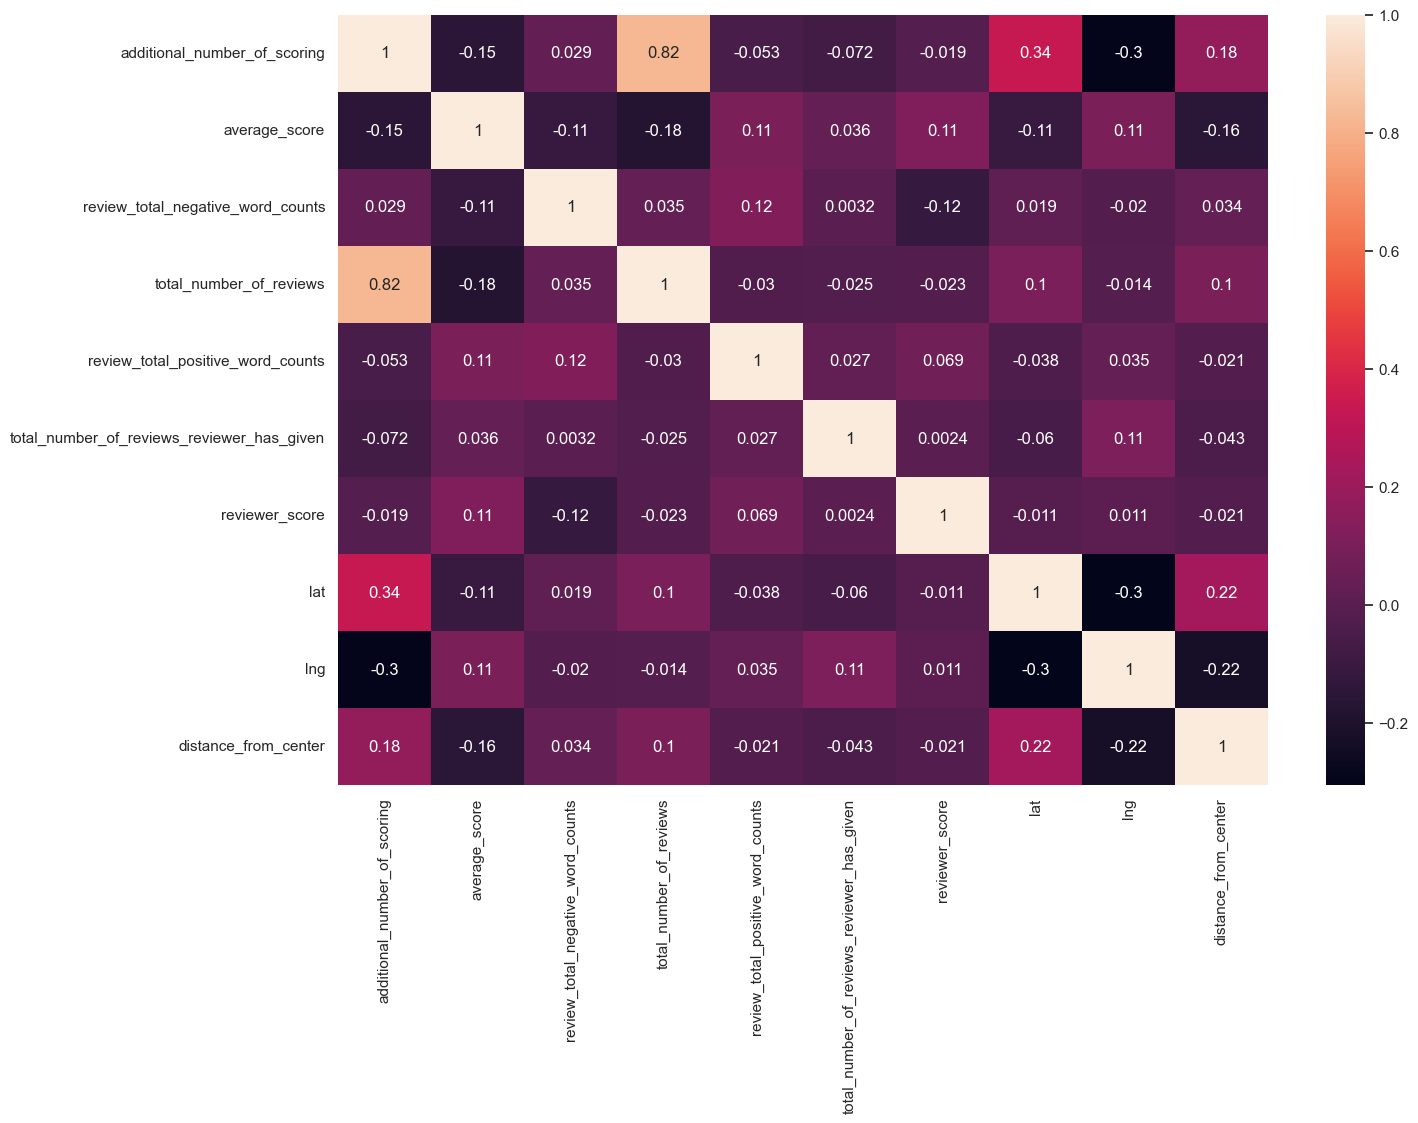

In [56]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(), annot=True)

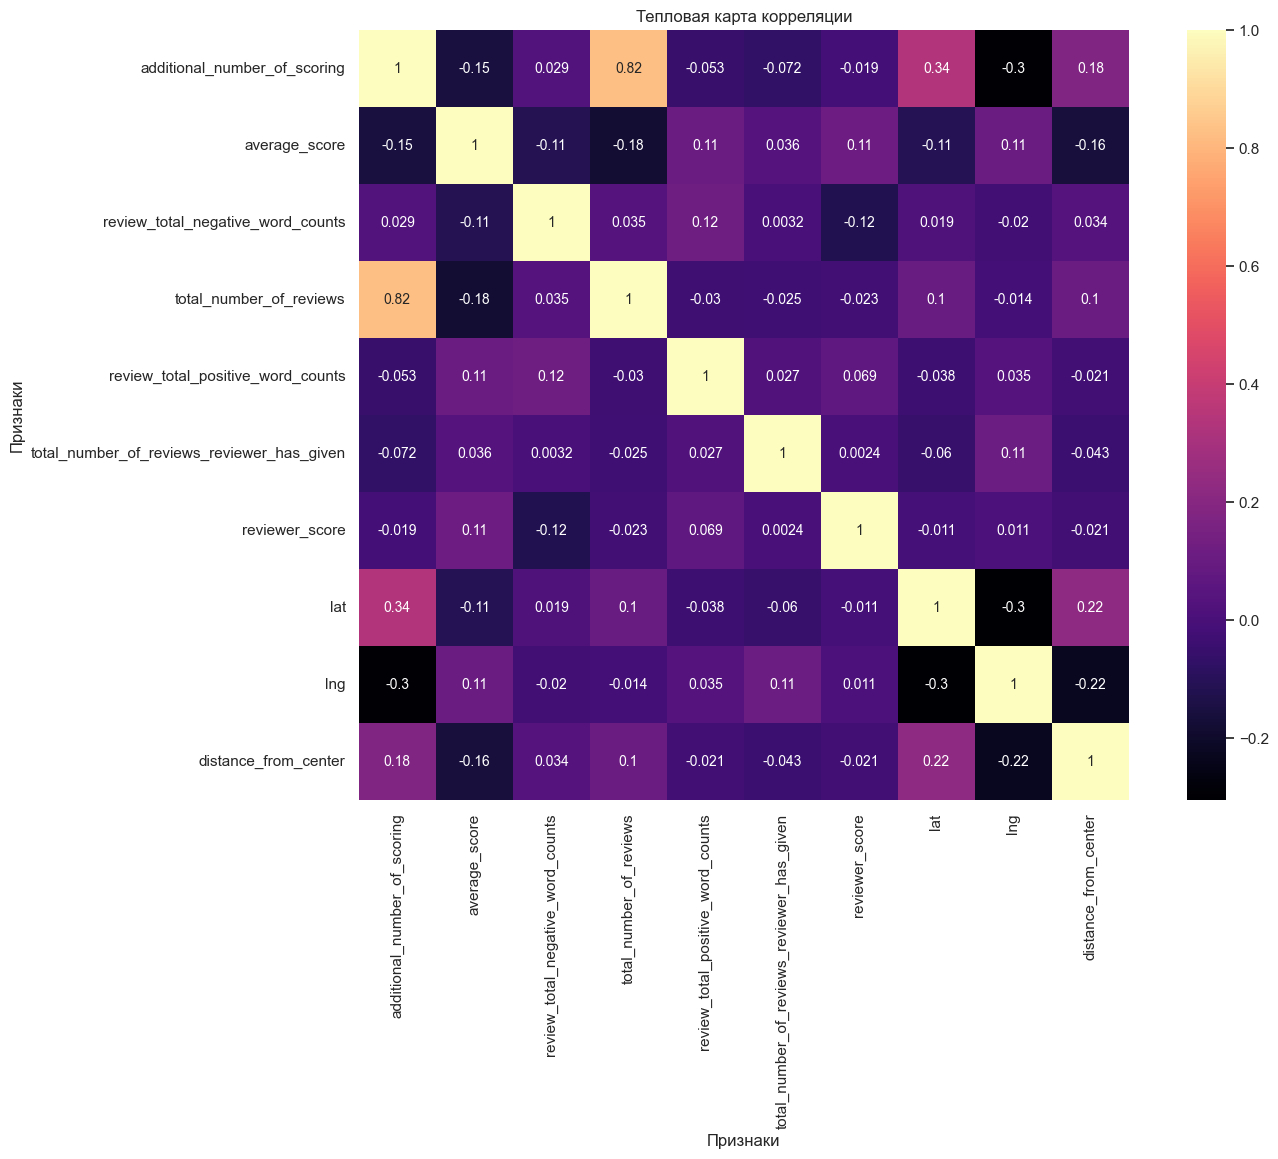

In [61]:
plt.rcParams['figure.figsize'] = (15, 10)

sns.heatmap(data.drop(['sample'], axis=1).corr(), annot=True, annot_kws={'size': 10}, cmap='magma', square=True)

plt.title('Тепловая карта корреляции')
plt.xlabel('Признаки')
plt.ylabel('Признаки')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.show()


Согласно данным графикам наблюдается тенденция, что наибольшее количество оценок сосредоточено в области от 8 до 9,5. Стоит отметить, что медианы у отелей Австрии и Испании больше, чем у отелей других стран, возможно это связано с меньшим количеством оценок. Однако, это может в целом влиять на оценку отеля.

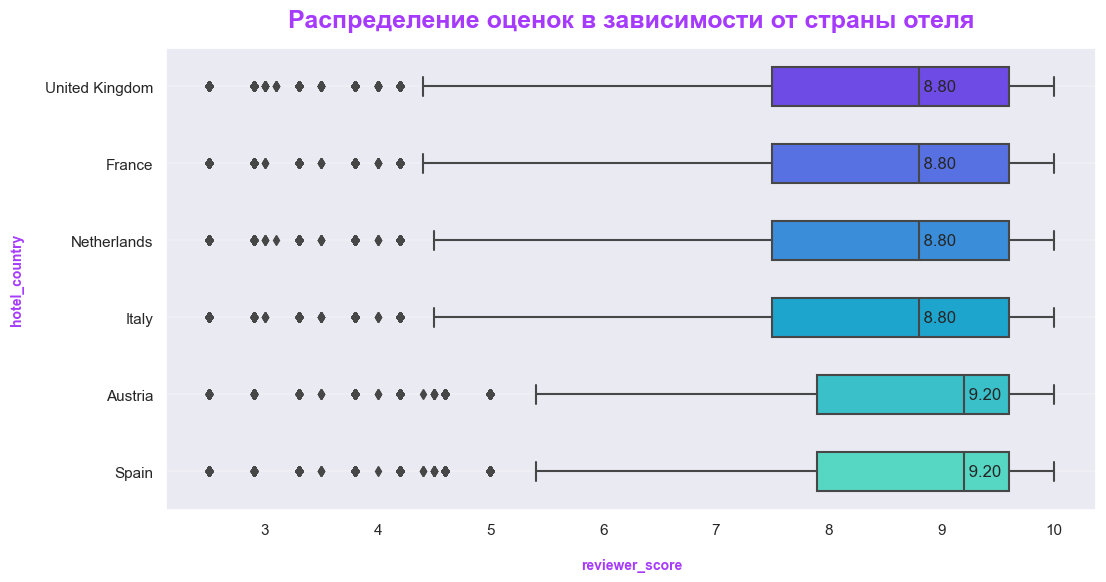

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(12, 6))

# Фильтруем данные для выборки 'sample' == 1
data_sample_1 = data[data['sample'] == 1]

boxplot = sns.boxplot(
    data=data_sample_1,
    y='hotel_country',
    x='reviewer_score',
    orient='h',
    width=0.5
)

# Вычисляем медианные значения для каждой страны
medians = data_sample_1.groupby('hotel_country')['reviewer_score'].median()

# Вставляем медианные значения на график с двумя знаками после запятой
for tick, label in enumerate(boxplot.get_yticklabels()):
    country = label.get_text()
    median_value = medians.get(country)
    boxplot.text(median_value, tick, f" {median_value:.2f}", verticalalignment='center')

boxplot.set_title('Распределение оценок в зависимости от страны отеля', fontsize=18, pad=15,
               fontdict={'color': '#a63bff', 'fontweight': 600})
boxplot.set_xlabel('reviewer_score', fontsize=10, labelpad=15,
               fontdict={'color': '#a63bff', 'fontweight': 600})
boxplot.set_ylabel('hotel_country', fontsize=10, labelpad=15,
               fontdict={'color': '#a63bff', 'fontweight': 600})

boxplot.grid()

plt.show()


In [42]:
data.sample(3)

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,...,distance_from_center,hotel_country,hotel_city,make_hotel_name,hotel_country_1,hotel_country_2,hotel_country_3,hotel_country_4,hotel_country_5,hotel_country_6
19763,1 15 Templeton Place Earl s Court Kensington a...,244,2017-03-31,8.5,K K Hotel George,United Kingdom,choice of food in bar wasn t too good but the...,26,1831,quiet comfy room Very helpful staff Excellent...,...,4.980755,United Kingdom,London,United Kingdom,1,0,0,0,0,0
167200,225 Edgware Road Westminster Borough London W2...,1485,2015-11-24,7.5,Hilton London Metropole,United Kingdom,Although our room was lovely the two bed base...,27,6977,Friendly hotel staff amenities very good and ...,...,3.272547,United Kingdom,London,United Kingdom,1,0,0,0,0,0
213585,22 Park Lane Westminster Borough London W1K 1B...,296,2017-07-06,7.8,London Hilton on Park Lane,United Kingdom,Cost of car park No discount and 50 was way t...,13,943,Location Customer Service throughout hotel,...,1.576122,United Kingdom,London,United Kingdom,1,0,0,0,0,0


<a id = '3.3'></a>
<p style="color: #b29aff; font-size: 45px;">
    <strong>3.3 Координаты расположения отелей </strong>
</p>

<style>
a {
    color: #a63bff !important;
    font-size: 20px !important;
}
</style>
⮬ <a href="#8">к оглавлению</a>

In [43]:
print(colored('\n Какие города получились в датасете:', '#ac67ff'))
print(f"Количество отелей с отсутствующими координатами: {data[data['lat'].isnull()]['hotel_name'].nunique()}.")


 Какие города получились в датасете:
Количество отелей с отсутствующими координатами: 17.


In [44]:

print(colored(f"Количество отелей с отсутствующими координатами: {data[data['lat'].isnull()]['hotel_name'].nunique()}.",'#ac67ff'))

Количество отелей с отсутствующими координатами: 17.


In [45]:
#поиск пропусков в данных

null_data = data.isnull().sum()

print(f'\nСтолбцы с пропусками данных:\n{null_data[null_data > 0]}')


Столбцы с пропусками данных:
lat                     3268
lng                     3268
city                    3268
country                 3268
post_index              3268
distance_from_center    3268
dtype: int64


In [46]:
# Нехитрым способом проверим, что пропуски по геоданным у одних и тех же записей.
# Как видим, мы выбрали данные где одновременно присутствует пропуски по обоим признакам,
# отняли от общего кол-ва записей и кол-во оставшихся записей точно равно данным из data.info()
data[(data.lng.isna()) & (data.lat.isna())].shape[0] - data.shape[0]

-512470

In [47]:
# формируем и выводим информацию о количестве уникальных значений в пропусках
hotels_isnull = data[data['lat'].isnull() | data['lng'].isnull()]
list_null = hotels_isnull[['hotel_name', 'hotel_address']].value_counts()
#list_isnull = hotels_isnull['hotel_name'].unique()
display(list_null)

hotel_name                                        hotel_address                                              
Fleming s Selection Hotel Wien City               Josefst dter Stra e 10 12 08 Josefstadt 1080 Vienna Austria    658
Hotel City Central                                Taborstra e 8 A 02 Leopoldstadt 1020 Vienna Austria            563
Hotel Atlanta                                     W hringer Stra e 33 35 09 Alsergrund 1090 Vienna Austria       389
Maison Albar Hotel Paris Op ra Diamond            4 rue de la P pini re 8th arr 75008 Paris France               290
Hotel Daniel Vienna                               Landstra er G rtel 5 03 Landstra e 1030 Vienna Austria         245
Hotel Pension Baron am Schottentor                W hringer Stra e 12 09 Alsergrund 1090 Vienna Austria          223
Austria Trend Hotel Schloss Wilhelminenberg Wien  Savoyenstra e 2 16 Ottakring 1160 Vienna Austria               194
Derag Livinghotel Kaiser Franz Joseph Vienna      Sieveringer Stra e 4 

Комментарии / выводы:

Пропуски содержатся в 2х признаках "lat" и "lng", количество записей составляет 3268 в каждом признаке или 0,63%;
Количество уникальных значений составляет - 17, по которым не заполнена информация по широте и долготе;
С учетом малого количества информации предлагается в ручном режиме с помощью адреса отеля определить данные широты и долготы и внести информацию в таблицу.

In [48]:
# формируем словарь с данными по широте
dict_lat = {'Austria Trend Hotel Schloss Wilhelminenberg Wien': '48.21974808057666', 
                'Holiday Inn Paris Montmartre': '48.889064368690235',
                'Fleming s Selection Hotel Wien City': '48.20949471863499',
                'Hotel Atlanta': '48.2209723965124',
                'Maison Albar Hotel Paris Op ra Diamond': '48.87543722920124',
                'Derag Livinghotel Kaiser Franz Joseph Vienna': '48.24608017805536',
                'Hotel City Central': '48.214201786014854',
                'NH Collection Barcelona Podium': '41.39176529029773',
                'City Hotel Deutschmeister': '48.22103057609981',
                'Hotel Daniel Vienna': '48.18897212994251',
                'Roomz Vienna': '48.22382961585223',
                'Hotel Pension Baron am Schottentor': '48.21692824899107',
                'Mercure Paris Gare Montparnasse': '48.84010021974514',
                'Hotel Park Villa': '48.23759024291264',
                'Hotel Advance': '41.38327316014033',
                'Renaissance Barcelona Hotel': '41.394162363243964',
                'Cordial Theaterhotel Wien': '48.20969901650749'}

In [49]:
# формируем словарь с данными по долготе
dict_lng = {'Austria Trend Hotel Schloss Wilhelminenberg Wien': '16.285624283904383', 
                'Holiday Inn Paris Montmartre': '2.333206641604505',
                'Fleming s Selection Hotel Wien City': '16.35350997041095',
                'Hotel Atlanta': '16.356650516337886',
                'Maison Albar Hotel Paris Op ra Diamond': '2.3234027262612256',
                'Derag Livinghotel Kaiser Franz Joseph Vienna': '16.34202545691955',
                'Hotel City Central': '16.379923233140797',
                'NH Collection Barcelona Podium': '2.1783660658934747',
                'City Hotel Deutschmeister': '16.366622226233126',
                'Hotel Daniel Vienna': '16.3838329415743',
                'Roomz Vienna': '16.393969343883455',
                'Hotel Pension Baron am Schottentor': '16.360055901096636',
                'Mercure Paris Gare Montparnasse': '2.3231778953046462',
                'Hotel Park Villa': '16.34703938556462',
                'Hotel Advance': '2.162964217594162',
                'Renaissance Barcelona Hotel': '2.1748749075722924',
                'Cordial Theaterhotel Wien': '16.351495483903957'}

In [50]:
# формируем код и производим заполнение данных в dataframe
data['lat'] = data.apply(lambda x: dict_lat.get(x['hotel_name']) if pd.isnull(x['lat']) else x['lat'], axis=1).astype('float64') # вводим данные по широте и устанавливаем тип float64
data['lng'] = data.apply(lambda x: dict_lng.get(x['hotel_name']) if pd.isnull(x['lng']) else x['lng'], axis=1).astype('float64') # вводим данные по долготе и устанавливаем тип float64

In [51]:
# формируем и выводим повторно информацию о наличие пропусков после обработки
display(data.isnull().sum())

hotel_address                                    0
additional_number_of_scoring                     0
review_date                                      0
average_score                                    0
hotel_name                                       0
reviewer_nationality                             0
negative_review                                  0
review_total_negative_word_counts                0
total_number_of_reviews                          0
positive_review                                  0
review_total_positive_word_counts                0
total_number_of_reviews_reviewer_has_given       0
reviewer_score                                   0
tags                                             0
days_since_review                                0
lat                                              0
lng                                              0
sample                                           0
month                                            0
year                           

<a id = '3.3.1'></a>
<p style="color: #b29aff; font-size: 40px;">
    <strong>3.3.1 Расстояние до центра</strong>
</p>

<style>
a {
    color: #a63bff !important;
    font-size: 20px !important;
}
</style>
⮬ <a href="#8">к оглавлению</a>

Можно рассчитать расстояние от отеля до центра города, возможно это влияет на оценку отеля.

In [52]:
%%time

import geopy.distance

# для формирования нового признака используются координаты центра каждого города 

centers = pd.DataFrame(
    data = [
        ['United Kingdom', 'London', 51.5085300, -0.1257400],
        ['France', 'Paris', 48.8534100, 2.3488000],
        ['Spain', 'Barcelona', 41.3887900, 2.1589900],
        ['Italy', 'Milan', 45.4642700, 9.1895100],
        ['Austria', 'Vienna', 48.2084900, 16.3720800],
        ['Netherlands', 'Amsterdam', 52.3740300, 4.8896900],
    ],
    columns= ['country', 'city', 'center_lat', 'center_lng']
).set_index('country')

#функция вычисления до центра города по координатам
def get_dist_to_center(country, lng, lat):
   
    center_lat = centers['center_lat'][country]
    center_lng = centers['center_lng'][country]

    return geopy.distance.geodesic([center_lng, center_lat], [lng, lat]).km

hotels_coord = data[['hotel_name', 'hotel_country', 'lng', 'lat']].drop_duplicates()
hotels_coord['hotel_distance_to_center'] = data.apply(
    lambda row: get_dist_to_center(row['hotel_country'], row['lng'], row['lat']), axis=1)

hotels_coord.drop(['hotel_country', 'lng', 'lat'], axis=1, inplace=True)

data = data.merge(hotels_coord, how='left', on='hotel_name', sort=False)

CPU times: total: 1min 22s
Wall time: 1min 23s


In [53]:
#посмотрим новый признак
data[['hotel_country', 'hotel_distance_to_center', 'reviewer_score']].sort_values(by='hotel_country').iloc[:10]

,hotel_country,hotel_distance_to_center,reviewer_score
387135,Austria,4.060249,0.0
403129,Austria,1.229248,0.0
221350,Austria,5.209262,7.1
113036,Austria,0.572859,9.2
40862,Austria,0.683433,7.9
113023,Austria,0.135233,8.3
40868,Austria,1.088678,10.0
113013,Austria,1.503339,9.2
221370,Austria,8.062943,9.6
494998,Austria,0.135233,0.0


In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515738 entries, 0 to 515737
Data columns (total 34 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

In [55]:
# Сгрупируем по отелям и посмотрим у каких отелей отсутствуют геоданные
hotels_with_coor = data[data.lng.isna() & data.lat.isna()].groupby(by = ['hotel_address','hotel_name']).\
  count().iloc[:,0].to_frame().reset_index()
hotels_with_coor.head(2)

,hotel_address,hotel_name,additional_number_of_scoring


<a id = '3.4'></a>
<p style="color: #b29aff; font-size: 45px;">
    <strong>3.4 Информация о рецензенте</strong>
</p>

<style>
a {
    color: #a63bff !important;
    font-size: 20px !important;
}
</style>
⮬ <a href="#8">к оглавлению</a>

In [74]:
data['reviewer_nationality'].describe()

count               515738
unique                 227
top        United Kingdom 
freq                245246
Name: reviewer_nationality, dtype: object

In [77]:

print(Fore.LIGHTCYAN_EX + "\nКоличество уникальных национальностей reviewer-ров:",data['reviewer_nationality'].nunique())


Количество уникальных национальностей reviewer-ров: 227


In [81]:
freq_value = data['reviewer_nationality'].value_counts().max()
print(Fore.LIGHTMAGENTA_EX + "\nКоличество уникальных национальностей reviewer-ров:",freq_value)




Количество уникальных национальностей reviewer-ров: 245246


In [82]:
from colorama import Fore

print(Fore.LIGHTMAGENTA_EX + "\nКоличество уникальных национальностей reviewer-ров:", freq_value)



Количество уникальных национальностей reviewer-ров: 245246


In [80]:
top_value = data['reviewer_nationality'].value_counts().idxmax()
print(top_value)


 United Kingdom 


In [16]:
#сгруппириуем данные для оценки параметра национальность
data1 = data[data['sample'] == 1]
data1 = data1.groupby('reviewer_nationality')['reviewer_score'].agg('mean').reset_index().sort_values(by='reviewer_score').iloc[:20]
data1.head()

,reviewer_nationality,reviewer_score
5,American Samoa,4.60
47,Cook Islands,5.00
137,Montserrat,5.40
149,Northern Mariana Islands,5.80
127,Mali,6.44


In [17]:
from colorama import Fore, Back, Style
# Null записей нет, но проверим на всякий случай, нет ли пустых записей
cnt_no_nationality = data[data.reviewer_nationality.str.strip() == ''].shape[0]
print(Fore.LIGHTCYAN_EX + "\nКоличество записей без указанной национальности reviewer-а:",cnt_no_nationality)


Количество записей без указанной национальности reviewer-а: 523


In [13]:

from colorama import Fore, Back, Style
print(Fore.LIGHTCYAN_EX + 'зеленый текст')
print(Back.YELLOW + 'на желтом фоне')
#print(Style.BRIGHT + 'стал ярче' + Style.RESET_ALL)
print('обычный текст')

зеленый текст
на желтом фоне
обычный текст


Количество записей без указанной национальности reviewer-а: 523

In [18]:
# заполним модой
mode_country_reviewer = data.reviewer_nationality.mode().item()
data.loc[data[data.reviewer_nationality.str.strip() == ''].index,'reviewer_nationality'] = mode_country_reviewer

In [20]:
# Наш топ 122. Почему 122, просто решил что примерно 50 отзывов, это минимальное, что 
# может нести в себе более менее усредненную информацию
countries_top = data['reviewer_nationality'].value_counts().nlargest(20)
countries_top.index = countries_top.index.map(str.strip)
countries_top

United Kingdom              245769
United States of America     35437
Australia                    21686
Ireland                      14827
United Arab Emirates         10235
Saudi Arabia                  8951
Netherlands                   8772
Switzerland                   8678
Germany                       7941
Canada                        7894
France                        7296
Israel                        6610
Italy                         6114
Belgium                       6031
Turkey                        5444
Kuwait                        4920
Spain                         4737
Romania                       4552
Russia                        3900
South Africa                  3821
Name: reviewer_nationality, dtype: int64

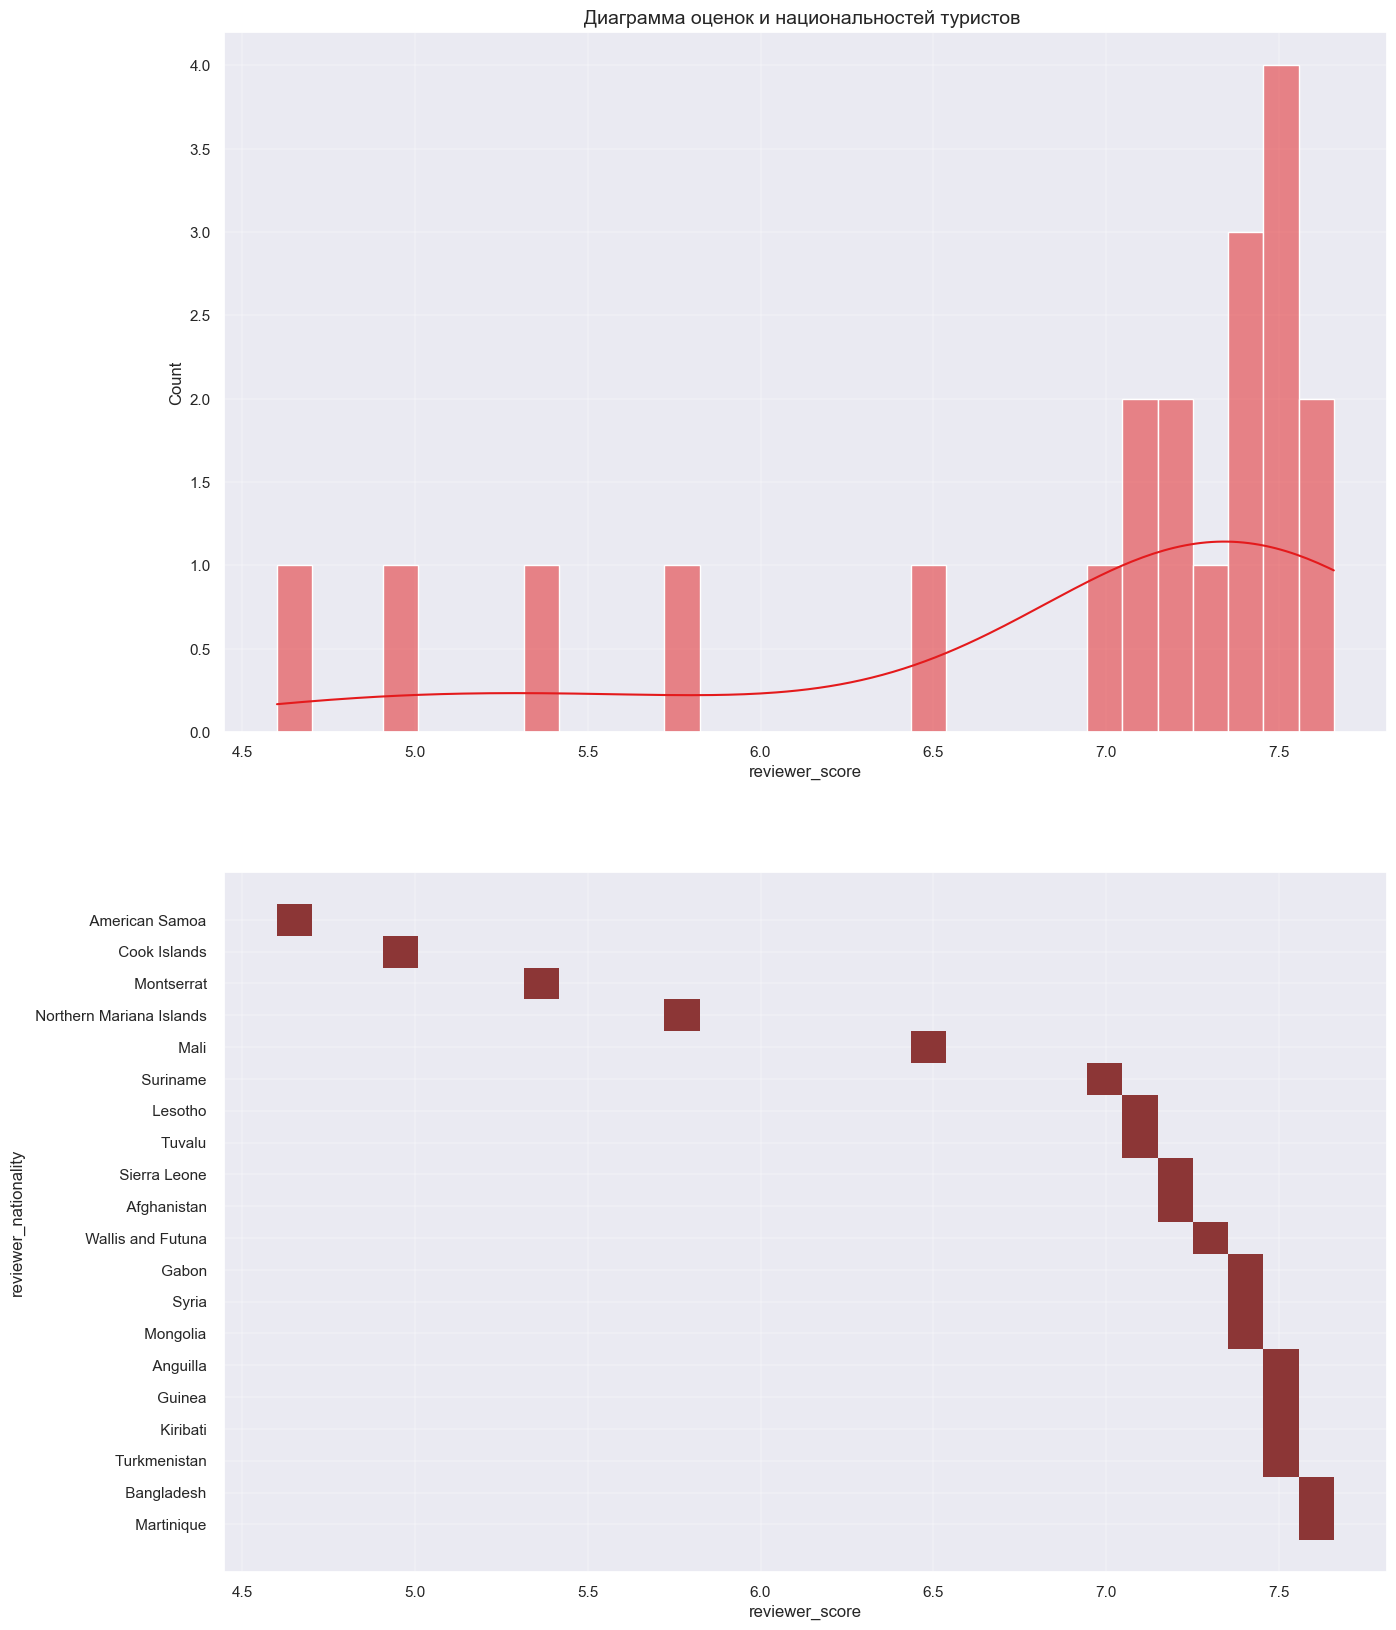

In [61]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 20))
sns.histplot(
    data = data1,
    x = 'reviewer_score',
    bins = 30,
    kde = True,
    ax = axes[0]
);
axes[0].set_title('Диаграмма оценок и национальностей туристов ', fontsize = 14)
sns.histplot(
    data = data1,
    x = 'reviewer_score',
    y = 'reviewer_nationality',
    bins = 30,
    color = 'red',
    ax = axes[1]
);

In [62]:
#закодируем название национальностей
import category_encoders as ce
ord_encoder = ce.OrdinalEncoder()
data['make_nationality'] = data['reviewer_nationality'].astype('category')
data_bin = ord_encoder.fit_transform(data['reviewer_nationality'])
data_bin.rename(columns={'reviewer_nationality' : 'nationality'}, inplace=True)
data = pd.concat([data, data_bin], axis=1)

In [63]:
data[['reviewer_nationality', 'nationality']].value_counts()

reviewer_nationality        nationality
 United Kingdom             1              245769
 United States of America   12              35437
 Australia                  36              21686
 Ireland                    21              14827
 United Arab Emirates       8               10235
                                            ...  
 Northern Mariana Islands   220                 1
 Vatican City               225                 1
 Guinea                     169                 1
 Anguilla                   164                 1
 Svalbard Jan Mayen         218                 1
Length: 226, dtype: int64

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515738 entries, 0 to 515737
Data columns (total 36 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

<a id = '3.5'></a>
<p style="color: #b29aff; font-size: 45px;">
    <strong>3.5 Обработка отзывов</strong>
</p>

<style>
a {
    color: #a63bff !important;
    font-size: 20px !important;
}
</style>
⮬ <a href="#8">к оглавлению</a>

In [65]:
%%time

from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Первым делов подправим явные выражения 
data['negative_review'] = data['negative_review'].apply(lambda x: x.replace('No Negative', 'Positive'))
data['negative_review'] = data['negative_review'].apply(lambda x: x.replace('N A', 'Positive'))
data['negative_review'] = data['negative_review'].apply(
    lambda x: x.replace('All good', 'Positive'))
data['negative_review'] = data['negative_review'].apply(
    lambda x: x.replace('No complaints', 'Positive'))
data['negative_review'] = data['negative_review'].apply(
    lambda x: x.replace('Nothing to dislike', 'Positive'))
data['positive_review'] = data['positive_review'].apply(
    lambda x: x.replace('No Positive', 'Negative'))

# создаем два экземпляра анализатора, чтобы разделить лексикон 
# для разной системы оценки положительных и отрицательных отзывов:
sia_neg = SentimentIntensityAnalyzer()
sia_pos = SentimentIntensityAnalyzer()

data['neg_scores'] = data['negative_review'].apply(lambda x: sia_neg.polarity_scores(x))
data['pos_scores'] = data['positive_review'].apply(lambda x: sia_pos.polarity_scores(x))

# формируем новые признаки:
data['n_review_sentiments_neg'] = data['neg_scores'].apply(lambda x: x['neg'])
data['n_review_sentiments_neu'] = data['neg_scores'].apply(lambda x: x['neu'])
data['n_review_sentiments_pos'] = data['neg_scores'].apply(lambda x: x['pos'])
data['n_review_sentiments_compound'] = data['neg_scores'].apply(lambda x: x['compound'])

data['p_review_sentiments_neg'] = data['pos_scores'].apply(lambda x: x['neg'])
data['p_review_sentiments_neu'] = data['pos_scores'].apply(lambda x: x['neu'])
data['p_review_sentiments_pos'] = data['pos_scores'].apply(lambda x: x['pos'])
data['p_review_sentiments_compound'] = data['pos_scores'].apply(lambda x: x['compound'])


CPU times: total: 2min 55s
Wall time: 2min 55s


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515738 entries, 0 to 515737
Data columns (total 46 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

<a id = '3.6'></a>
<p style="color: #b29aff; font-size: 45px;">
    <strong>3.6 Tags</strong>
</p>

<style>
a {
    color: #a63bff !important;
    font-size: 20px !important;
}
</style>
⮬ <a href="#8">к оглавлению</a>

In [67]:
data['tags'][5]


"[' Business trip ', ' Solo traveler ', ' Superior Twin Room ', ' Stayed 1 night ', ' Submitted from a mobile device ']"

In [68]:
len(data['tags'][5].split(','))

5

In [69]:
len(data['tags'][5])

118

In [70]:
data['len_tags'] = data['tags'].apply(lambda x: len(x.split(',')))

print(f'Максимальное количество тегов в 1 строке данных: \n {data["len_tags"].max()} \n')

print('Примеры:')
print(data[data['len_tags'] == data['len_tags'].max()]['tags'].iloc[0])
print(data[data['len_tags'] == data['len_tags'].max()]['tags'].iloc[1])

Максимальное количество тегов в 1 строке данных: 
 6 

Примеры:
[' With a pet ', ' Leisure trip ', ' Solo traveler ', ' Standard Double Room ', ' Stayed 2 nights ', ' Submitted from a mobile device ']
[' With a pet ', ' Leisure trip ', ' Group ', ' Superior Twin Room ', ' Stayed 3 nights ', ' Submitted from a mobile device ']


In [71]:
print(data[data['len_tags'] == data['len_tags'].max()]['tags'])

698       [' With a pet ', ' Leisure trip ', ' Solo trav...
1276      [' With a pet ', ' Leisure trip ', ' Group ', ...
1407      [' With a pet ', ' Leisure trip ', ' Family wi...
2102      [' With a pet ', ' Business trip ', ' Couple '...
2281      [' With a pet ', ' Leisure trip ', ' Group ', ...
                                ...                        
512523    [' With a pet ', ' Leisure trip ', ' Couple ',...
512524    [' With a pet ', ' Leisure trip ', ' Couple ',...
514353    [' With a pet ', ' Leisure trip ', ' Group ', ...
514813    [' With a pet ', ' Business trip ', ' Family w...
515123    [' With a pet ', ' Leisure trip ', ' Family wi...
Name: tags, Length: 755, dtype: object


In [72]:
tags_string = ','.join(data['tags'])
tag_set = set(tags_string.split(','))
len(tag_set)

2474

In [73]:
#print(tags_string)

In [74]:
#len(set(tags_string))

In [75]:
tags1_string = ','.join(df_train['tags'])
tag1_set = set(tags1_string.split(','))
len(tag1_set)

2413

In [76]:
# формируем код функции для очистки tags
def get_change_tags(args):
    new_list = []
    clean = args.replace("'", "").replace("[","").replace("]","").split(",")
    for i in clean:
        j = i.strip()
        new_list.append(j)

    return new_list

In [77]:
# формируем код и производим очистку данных и выводим информацию о количестве уникальных tags
data['tags'] = data['tags'].apply(get_change_tags)
display(f'Уникальное количество тегов составляет {(data.tags.explode().nunique())}')

'Уникальное количество тегов составляет 2428'

In [78]:
# формируем код и выводим количественные данные использования тегов - 10 первых позиций
data['tags'].explode().value_counts().head(10)

Leisure trip                      417778
Submitted from a mobile device    307640
Couple                            252294
Stayed 1 night                    193645
Stayed 2 nights                   133937
Solo traveler                     108545
Stayed 3 nights                    95821
Business trip                      82939
Group                              65392
Family with young children         61015
Name: tags, dtype: int64

In [79]:
data['tags'].explode().value_counts().iloc[1:5]

Submitted from a mobile device    307640
Couple                            252294
Stayed 1 night                    193645
Stayed 2 nights                   133937
Name: tags, dtype: int64

In [80]:
# формируем код и вывоводим лист 10 первых tags
tags_list = data['tags'].explode().value_counts().head(10).index.tolist()
display(tags_list)

['Leisure trip',
 'Submitted from a mobile device',
 'Couple',
 'Stayed 1 night',
 'Stayed 2 nights',
 'Solo traveler',
 'Stayed 3 nights',
 'Business trip',
 'Group',
 'Family with young children']

In [81]:
# формируем код функции которая создает новые признаки из признаков tags
def add_tags(df, list):
    for review in list:
        col_name = "tags_" + review.lower()
        df[col_name] = df['tags'].apply(lambda x: 1 if review in x else 0)
    return df

In [82]:
# формируем код и производим создание бинарных признаков из tags
data = add_tags(data, tags_list)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515738 entries, 0 to 515737
Data columns (total 57 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

<a id = '4'></a>
<p style = "background-color : #ac67ff; border-radius: 5px 5px; padding : 10px">
<p style="color: #b29aff; font-size: 50px;">
    <strong>4. Очистка данных</strong>
</p>

<style>
a {
    color: #a63bff !important;
    font-size: 20px !important;
}
</style>
⮬ <a href="#8">к оглавлению</a>

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515738 entries, 0 to 515737
Data columns (total 57 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   hotel_address                               515738 non-null  object        
 1   additional_number_of_scoring                515738 non-null  int64         
 2   review_date                                 515738 non-null  datetime64[ns]
 3   average_score                               515738 non-null  float64       
 4   hotel_name                                  515738 non-null  object        
 5   reviewer_nationality                        515738 non-null  object        
 6   negative_review                             515738 non-null  object        
 7   review_total_negative_word_counts           515738 non-null  int64         
 8   total_number_of_reviews                     515738 non-null  int64        

In [84]:
data.drop(['lat','lng'], axis = 1, inplace=True)

In [85]:
#data.drop('year', axis = 1, inplace=True)

In [86]:
#del data['make_hotel_name']

In [87]:
#del data['make_nationality']

In [88]:
# посмотрим признаки, которые типов категория, дата, и строки
def getNonNumberTypeFeatures(df):
    """Функция возвращает в списке все признаки из датасета, что подходят под описанные правила

    Args:
        df (pandas.Dataframe()): Датасет

    Returns:
        list: Список признаков
    """
    object_columns = [s for s in data.columns
                    if ((data[s].dtypes == 'object') | \
                        (data[s].dtype.name == 'category') | \
                        (data[s].dtypes == 'datetime64[ns]') |
                        (data[s].dtype.name == 'period[M]'))]
    return object_columns

types_list = getNonNumberTypeFeatures(data)
#print(Fore.LIGHTCYAN_EX + "\nКоличество признаков, которые надо удалить,\
# либо привести к машиноподходящему типу:",Fore.LIGHTGREEN_EX, types_list.__len__())
display(types_list)

['hotel_address',
 'review_date',
 'hotel_name',
 'reviewer_nationality',
 'negative_review',
 'positive_review',
 'tags',
 'days_since_review',
 'city',
 'country',
 'post_index',
 'hotel_country',
 'hotel_city',
 'make_hotel_name',
 'make_nationality',
 'neg_scores',
 'pos_scores']

In [89]:
data.drop(types_list, axis = 1, inplace=True)

In [90]:
data.sample(5)

,additional_number_of_scoring,average_score,review_total_negative_word_counts,total_number_of_reviews,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,sample,month,year,...,tags_leisure trip,tags_submitted from a mobile device,tags_couple,tags_stayed 1 night,tags_stayed 2 nights,tags_solo traveler,tags_stayed 3 nights,tags_business trip,tags_group,tags_family with young children
475693,1198,8.5,7,6596,8,1,0.0,0,4,2016,...,1,1,1,1,0,0,0,0,0,0
387291,203,9.0,5,1349,18,21,0.0,0,5,2016,...,1,0,1,0,0,0,1,0,0,0
268440,191,8.0,0,1189,29,10,10.0,1,7,2017,...,1,0,0,0,1,0,0,0,1,0
130897,343,8.4,5,3222,26,1,7.5,1,9,2015,...,1,1,0,0,0,0,1,0,0,1
263306,834,9.1,6,4687,4,2,9.6,1,4,2017,...,0,1,1,0,0,0,0,0,0,0


In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515738 entries, 0 to 515737
Data columns (total 38 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   additional_number_of_scoring                515738 non-null  int64  
 1   average_score                               515738 non-null  float64
 2   review_total_negative_word_counts           515738 non-null  int64  
 3   total_number_of_reviews                     515738 non-null  int64  
 4   review_total_positive_word_counts           515738 non-null  int64  
 5   total_number_of_reviews_reviewer_has_given  515738 non-null  int64  
 6   reviewer_score                              515738 non-null  float64
 7   sample                                      515738 non-null  int64  
 8   month                                       515738 non-null  int64  
 9   year                                        515738 non-null  int64  
 

<a id = '5'></a>
<p style = "background-color : #ac67ff; border-radius: 5px 5px; padding : 10px">
<p style="color: #b29aff; font-size: 50px;">
    <strong>5. Model</strong>
</p>

<style>
a {
    color: #a63bff !important;
    font-size: 20px !important;
}
</style>
⮬ <a href="#8">к оглавлению</a>

In [92]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.reviewer_score.values            # наш таргет
X = train_data.drop(['reviewer_score'], axis=1)

In [93]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [94]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((128935, 37), (386803, 37), (386803, 36), (309442, 36), (77361, 36))

In [95]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
#from sklearn import metrics # инструменты для оценки точности модели

In [96]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [ ]:
%%time
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

<a id = '5.1'></a>
<p style="color: #b29aff; font-size: 45px;">
    <strong>5.1 Получение средней абсолютной ошибки</strong>
</p>

In [ ]:
# сравниваем предсказанные значения (y_pred) с реальными (y_test), 
# метрика Mean Absolute Percentage Error (MAPE) показывает среднюю абсолютную 
# процентную ошибку предсказанных значений от фактических:

def mean_absolute_percentage_error(y_tr, y_pr):
    """Получение средней абсолютной ошибки"""
    y_tr, y_pr = np.array(y_tr), np.array(y_pr)
    return np.mean(np.abs((y_tr - y_pr) / y_tr)) * 100

print('MAPE:', round(mean_absolute_percentage_error(y_test, y_pred), 2))

<a id = '6'></a>
<p style = "background-color : #ac67ff; border-radius: 5px 5px; padding : 10px">
<p style="color: #b29aff; font-size: 50px;">
    <strong>6. Conclusion</strong>
</p>

<style>
a {
    color: #a63bff !important;
    font-size: 20px !important;
}
</style>
⮬ <a href="#8">к оглавлению</a>

In [ ]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

<a id = '7'></a>
<p style = "background-color : #ac67ff; border-radius: 5px 5px; padding : 10px">
<p style="color: #b29aff; font-size: 50px;">
    <strong>7. Submission</strong>
</p>

In [ ]:
test_data.sample(3)

In [ ]:
test_data = test_data.drop(['reviewer_score'], axis=1)

In [ ]:
sample_submission

In [ ]:
predict_submission = model.predict(test_data)

In [ ]:
predict_submission

In [ ]:
list(sample_submission)

In [ ]:
sample_submission['reviewer_score'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)